In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('C:\\Users\\bikki\\Downloads\\Diabetes.csv')
df.head()

Number of times pregnant   Plasma glucose concentration  \
0                          6                            148   
1                          1                             85   
2                          8                            183   
3                          1                             89   
4                          0                            137   

    Diastolic blood pressure   Triceps skin fold thickness  \
0                         72                            35   
1                         66                            29   
2                         64                             0   
3                         66                            23   
4                         40                            35   

    2-Hour serum insulin   Body mass index   Diabetes pedigree function  \
0                      0              33.6                        0.627   
1                      0              26.6                        0.351   
2                      0              23.3                        0.672   
3                     94              28.1                        0.167   
4                    168              43.1                        2.288   

    Age (years) Outcome  
0            50     YES  
1            31      NO  
2            32     YES  
3            21      NO  
4            33     YES

## Data Pre-Processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8   Outcome                        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [7]:
df = df.rename(columns={
    ' Number of times pregnant': 'Pregnancies',
    ' Plasma glucose concentration': 'Glucose',
    ' Diastolic blood pressure': 'Blood_Pressure',
    ' Triceps skin fold thickness': 'Skin_Thickness',
    ' 2-Hour serum insulin': 'Insulin',
    ' Body mass index': 'BMI',
    ' Diabetes pedigree function': 'Diabetes_Pedigree_Function',
    ' Age (years)': 'Age'
})

### Data Cleaning and Feature Engineering

In [8]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

In [9]:
print(df.duplicated().sum())

0


#### There is no missing value and duplicate value

### Encoding Categorical Variables

In [11]:
df['Outcome'] = df['Outcome'].map({'YES': 1, 'NO': 0})

### Outlier Treatment

Processing column: Glucose


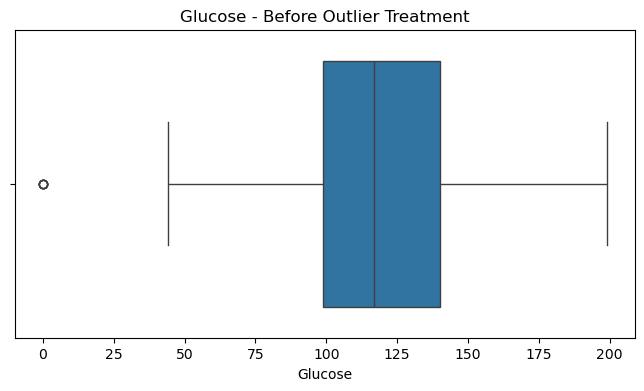

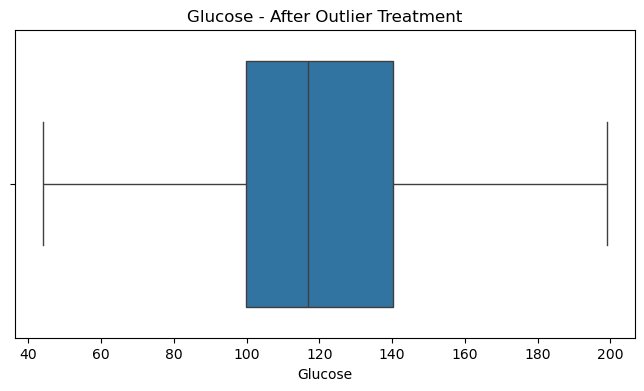

Processing column: Skin_Thickness


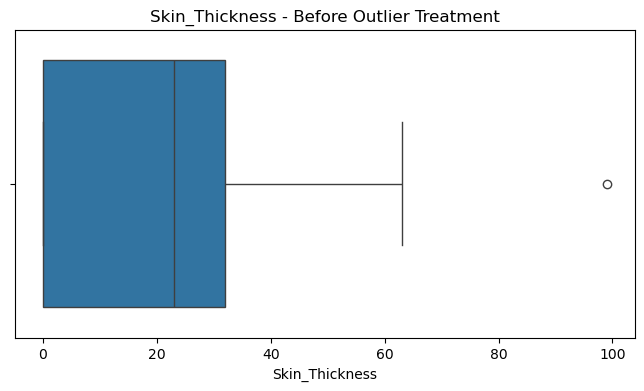

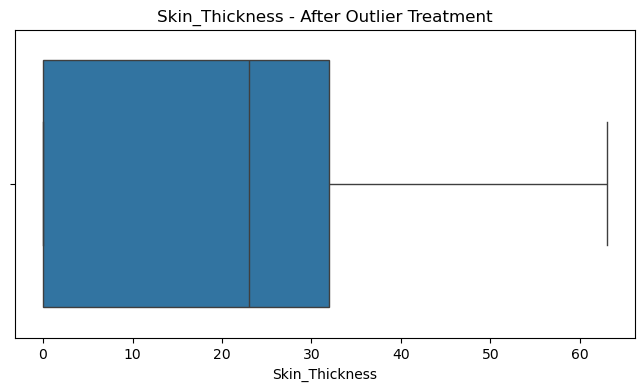

Processing column: Blood_Pressure


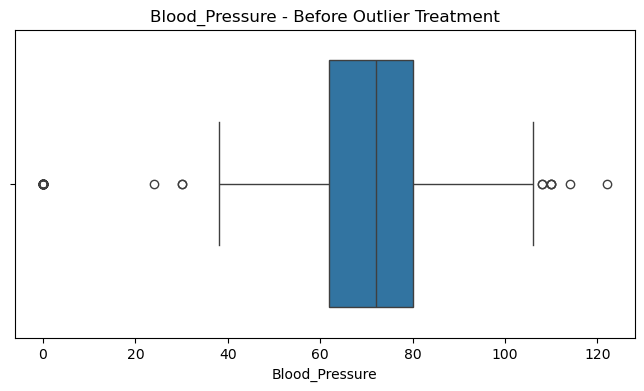

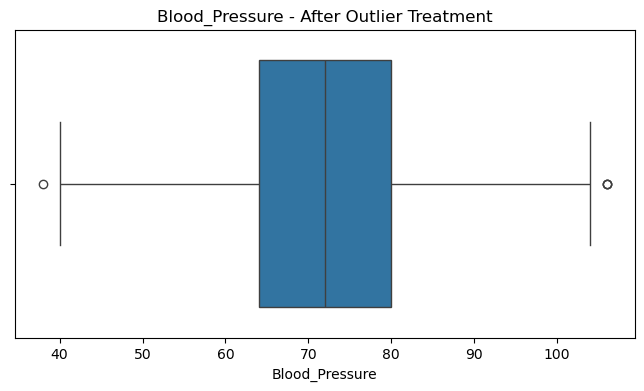

Processing column: Insulin


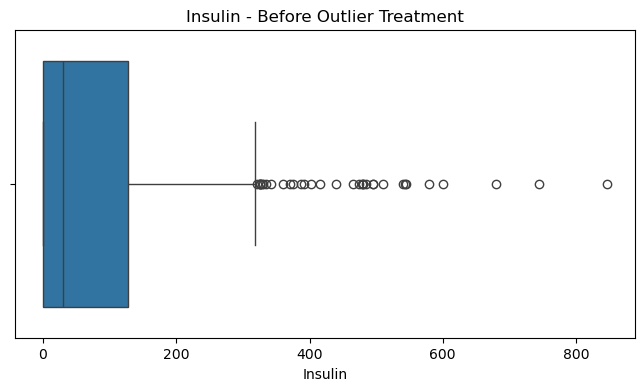

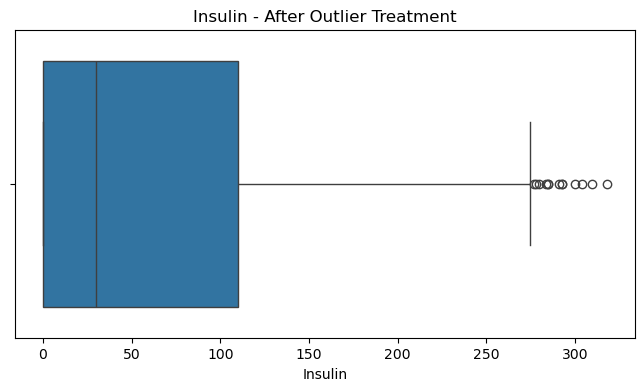

Processing column: BMI


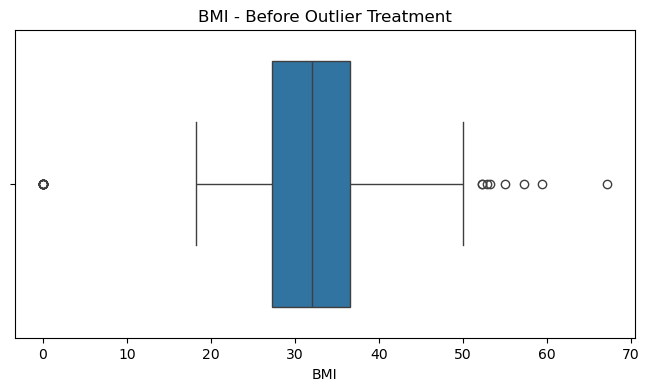

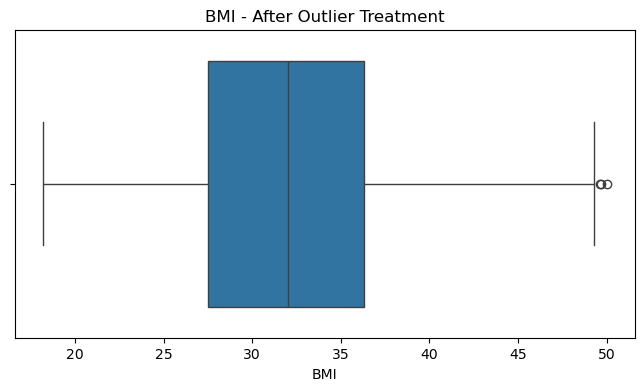

Processing column: Diabetes_Pedigree_Function


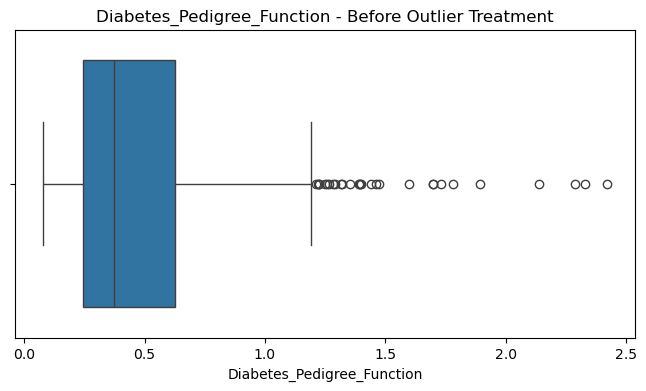

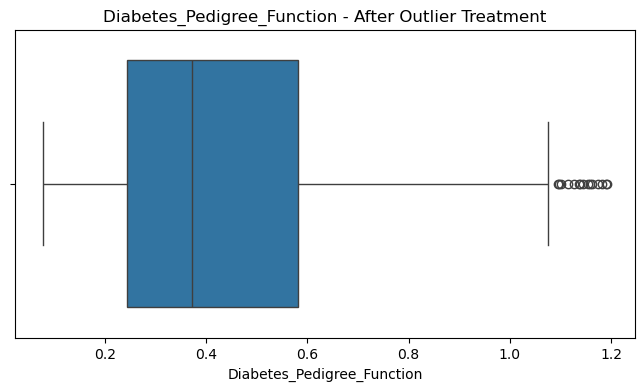

In [12]:
# Function for outlier detection and treatment
def outlier_treatment(df):
    # Specified columns for outlier treatment
    specified_columns = ["Glucose", "Skin_Thickness", "Blood_Pressure", "Insulin", "BMI", "Diabetes_Pedigree_Function"]
    
    for column in specified_columns:
        print(f"Processing column: {column}")
        
        # Box plot before treatment
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f"{column} - Before Outlier Treatment")
        plt.show()
        
        # Calculate IQR, lower and upper bounds
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the median
        median_value = df[column].median()
        df[column] = df[column].apply(
            lambda x: median_value if x < lower_bound or x > upper_bound else x
        )
        
        # Box plot after treatment
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f"{column} - After Outlier Treatment")
        plt.show()
    
    return df

df_cleaned = outlier_treatment(df)

### Univariate Numerical Analysis

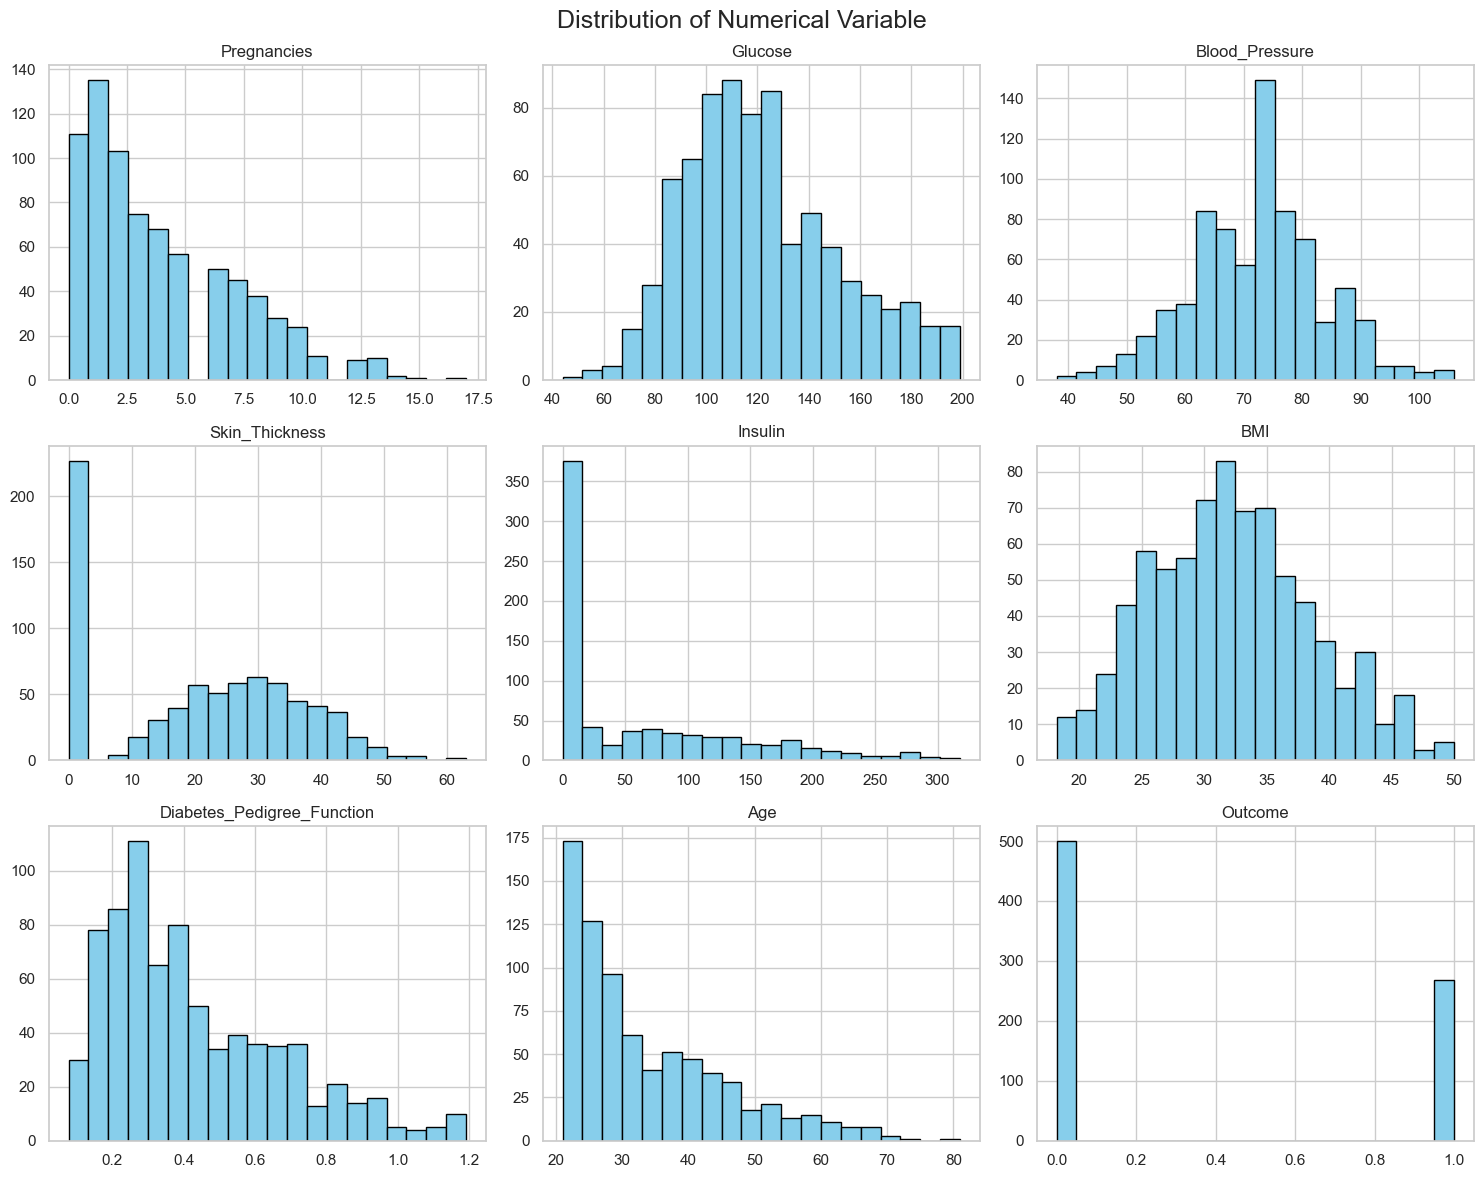

In [13]:
sns.set(style='whitegrid')

# Ploting histogram for all numeric columns

df.hist(figsize=(15, 12),bins=20,color='skyblue',edgecolor='black')
plt.suptitle('Distribution of Numerical Variable',fontsize=18)
plt.tight_layout()
plt.show()

### Bivariate Analysis

C:\Users\bikki\AppData\Local\Temp\ipykernel_27352\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


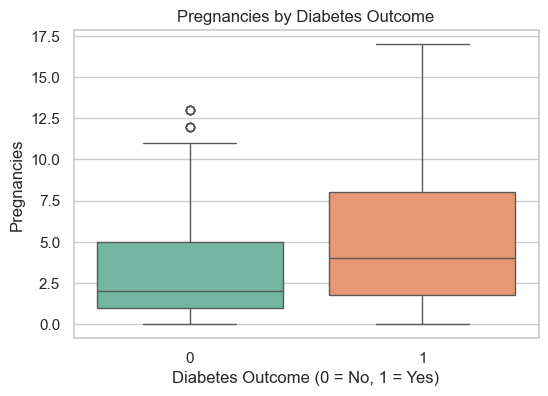

C:\Users\bikki\AppData\Local\Temp\ipykernel_27352\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


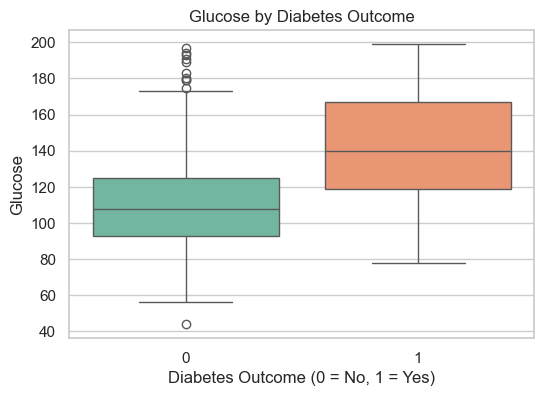

C:\Users\bikki\AppData\Local\Temp\ipykernel_27352\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


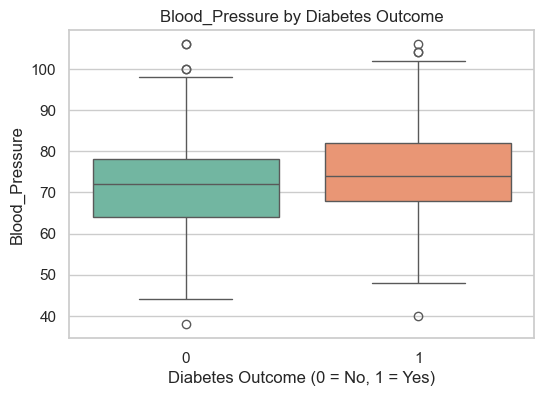

C:\Users\bikki\AppData\Local\Temp\ipykernel_27352\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


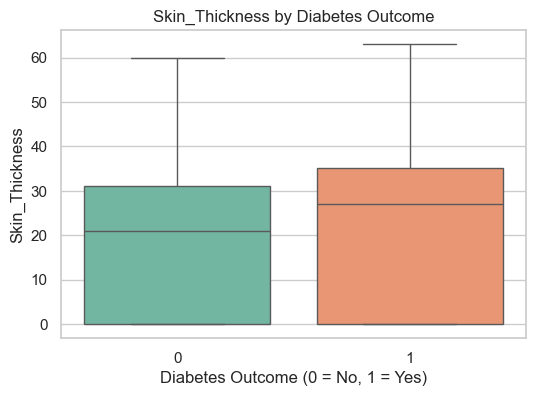

C:\Users\bikki\AppData\Local\Temp\ipykernel_27352\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


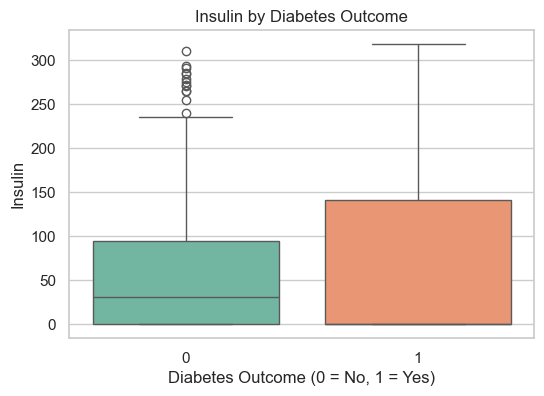

C:\Users\bikki\AppData\Local\Temp\ipykernel_27352\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


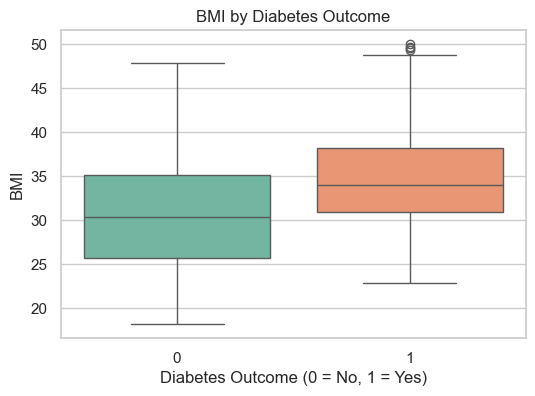

C:\Users\bikki\AppData\Local\Temp\ipykernel_27352\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


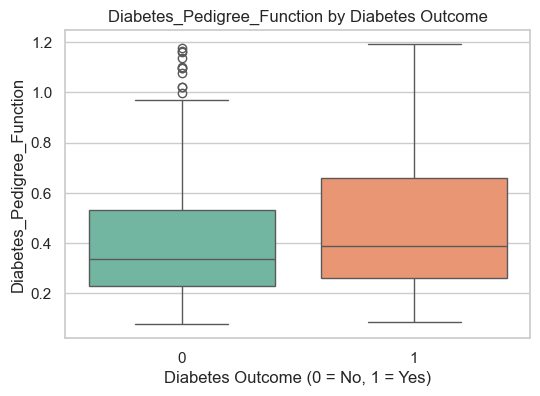

C:\Users\bikki\AppData\Local\Temp\ipykernel_27352\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


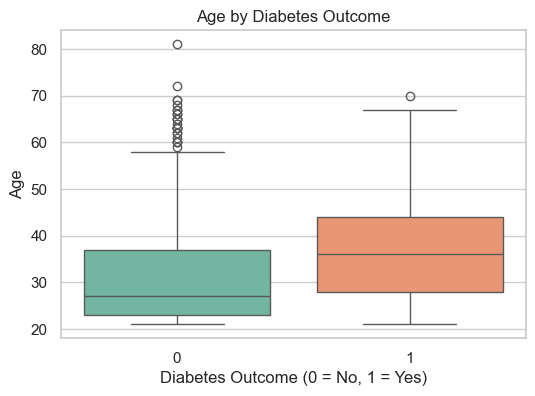

In [14]:
features = df.columns[:-1]  # exclude Outcome

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')
    plt.title(f"{feature} by Diabetes Outcome")
    plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()

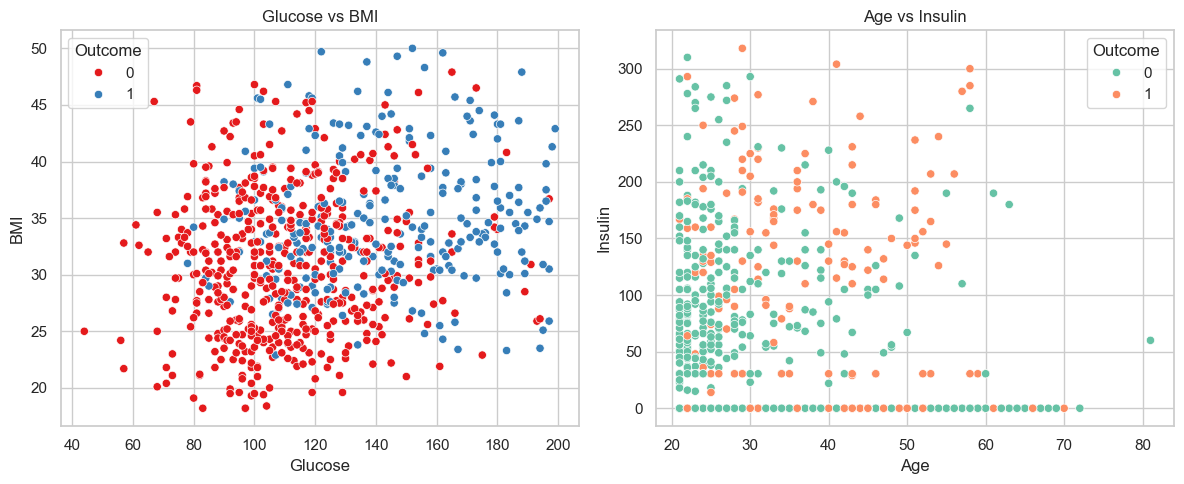

In [15]:
# Scatter plots between selected variables
plt.figure(figsize=(12, 5))

# Glucose vs BMI
plt.subplot(1, 2, 1)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='Set1')
plt.title("Glucose vs BMI")

# Age vs Insulin
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Insulin', hue='Outcome', data=df, palette='Set2')
plt.title("Age vs Insulin")

plt.tight_layout()
plt.show()

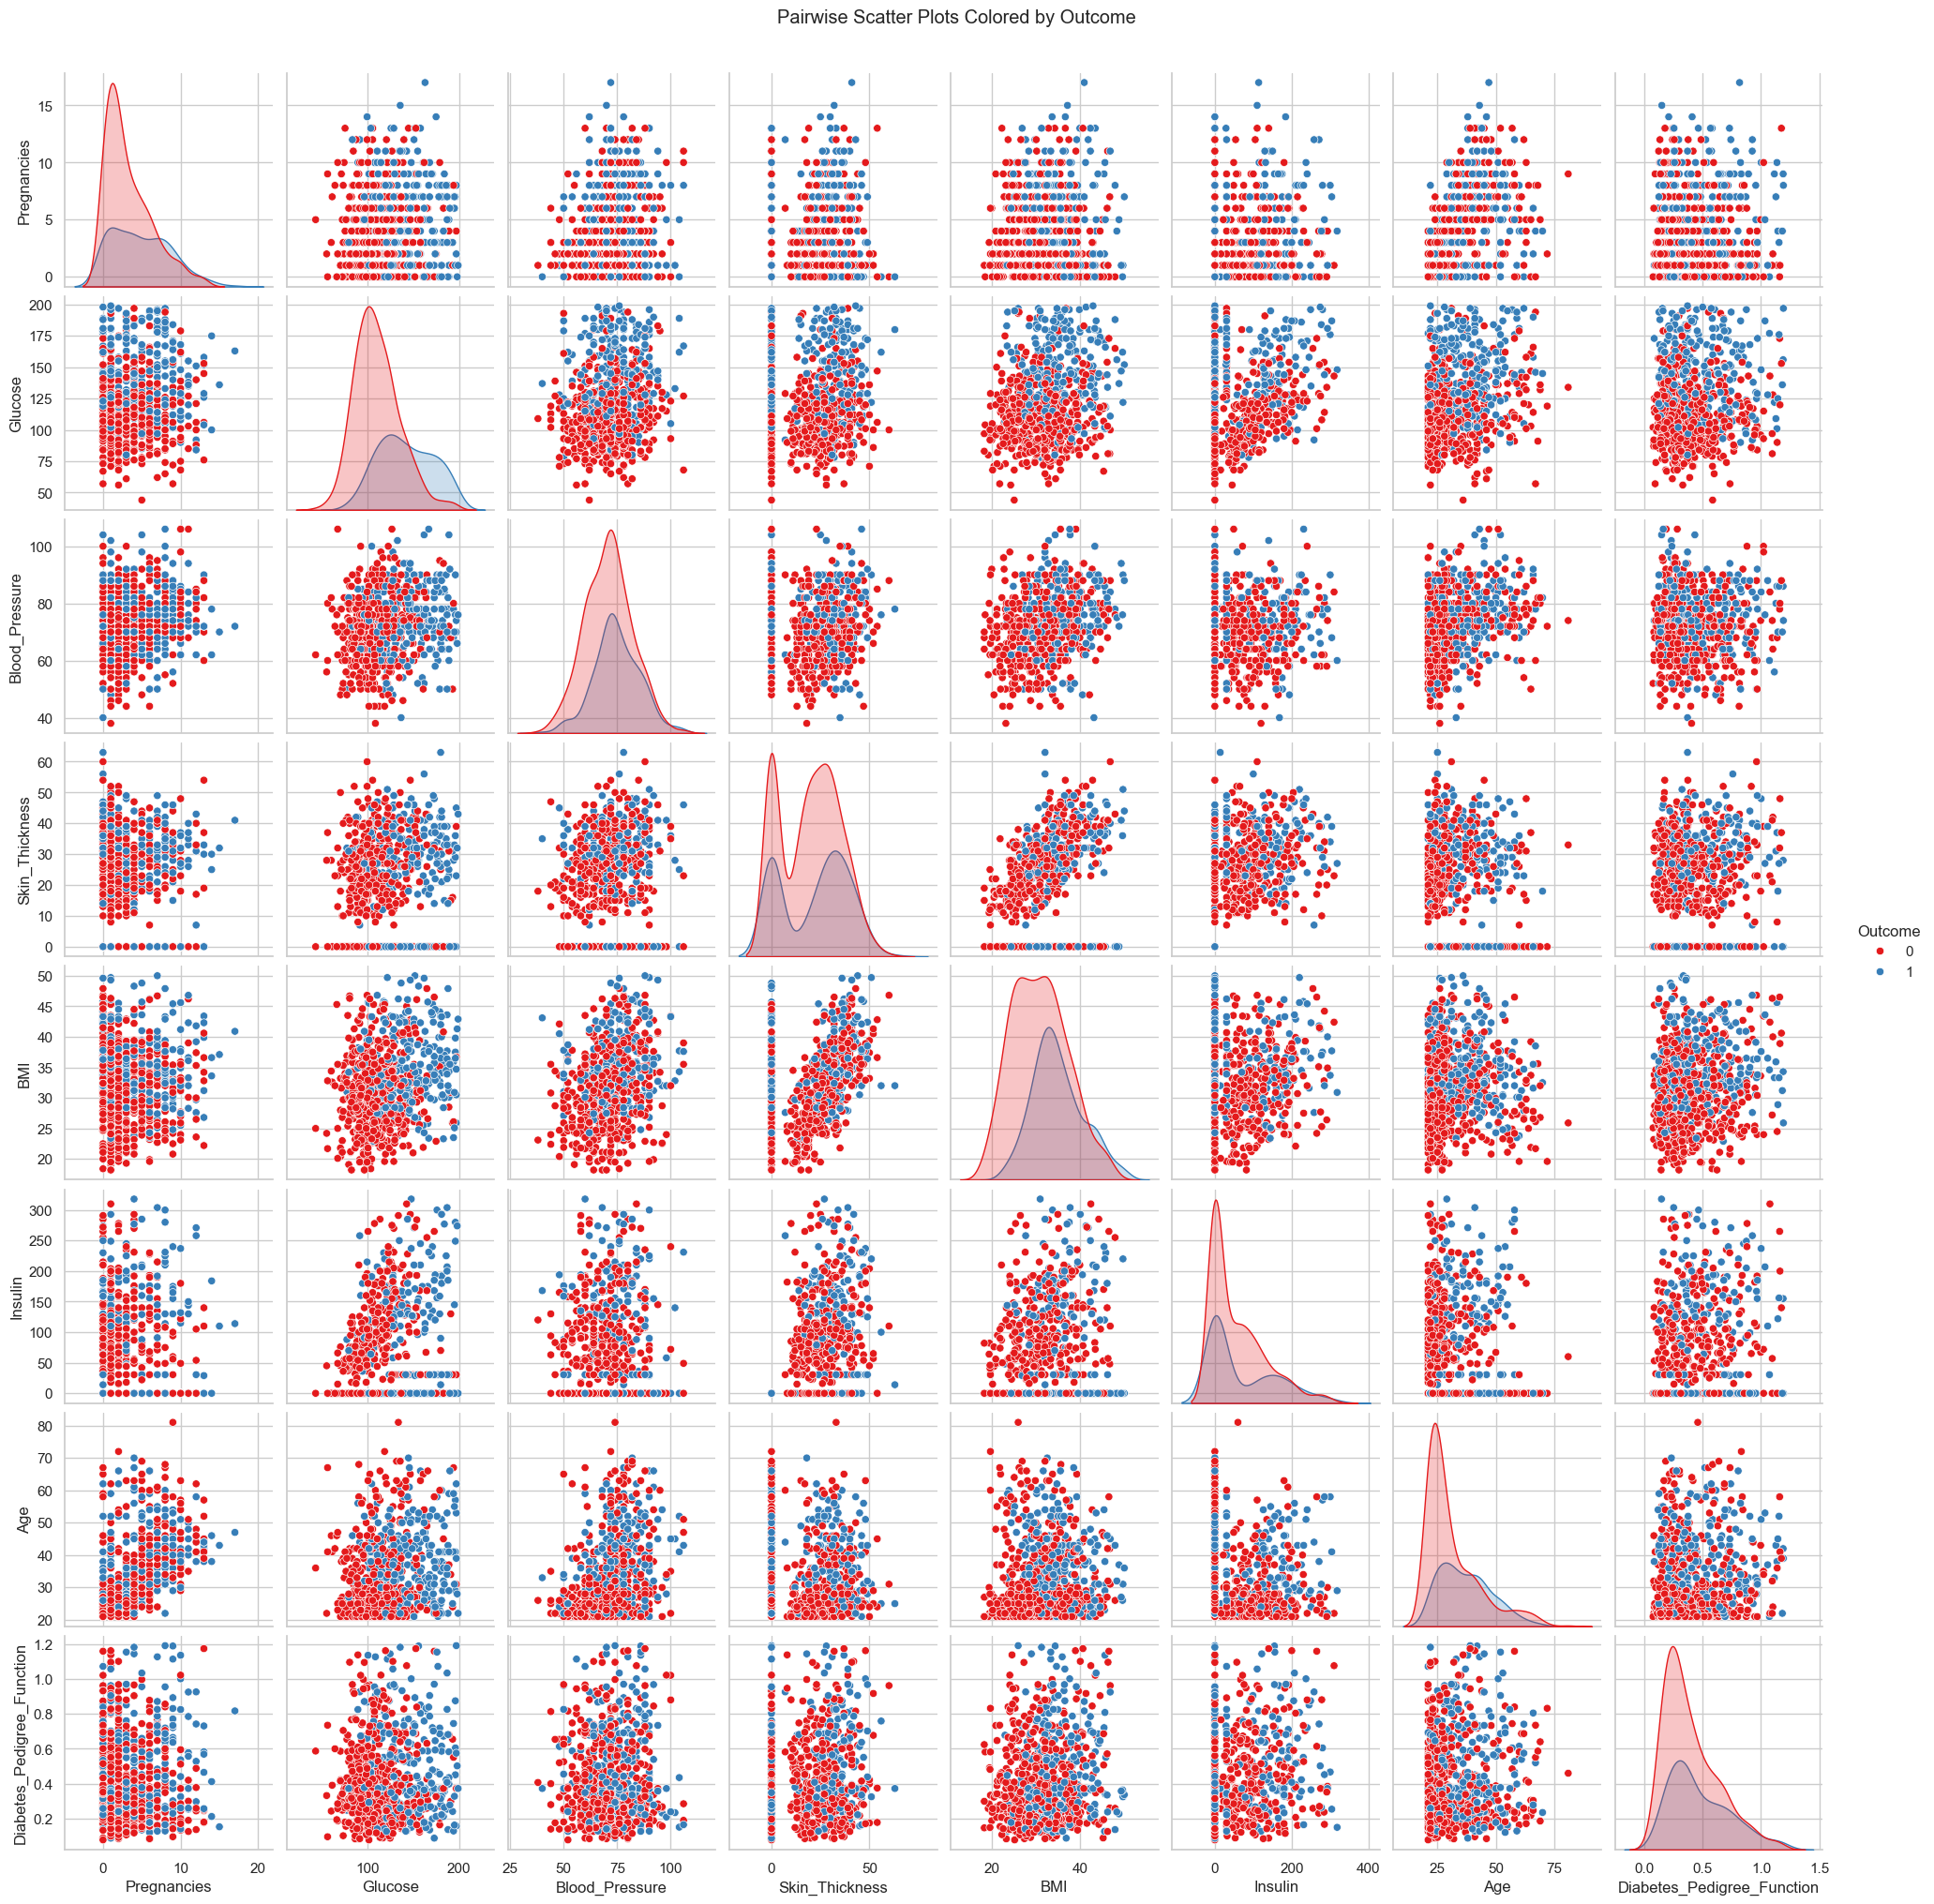

In [16]:
# Pairplot for selected features (to avoid clutter)
selected_features = ['Pregnancies','Glucose','Blood_Pressure','Skin_Thickness', 'BMI', 'Insulin', 'Age', 'Outcome','Diabetes_Pedigree_Function']
sns.pairplot(df[selected_features], hue='Outcome', diag_kind='kde', palette='Set1')
plt.suptitle("Pairwise Scatter Plots Colored by Outcome", y=1.02)
plt.show()

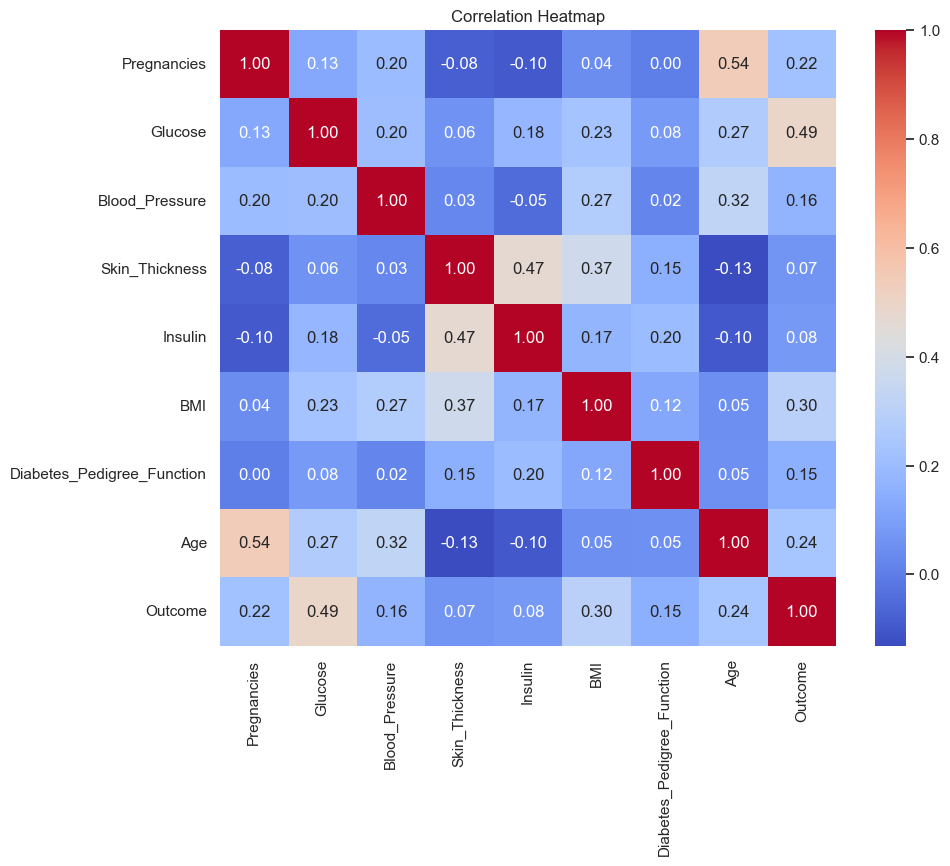

In [17]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

## Model Bulding

In [22]:
x= df.drop('Outcome',axis = 1)
y = df[['Outcome']]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [24]:
len(x_train)

576

In [25]:
len(y_test)

192

### Model Training

### DecisionTree Model

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,roc_curve, auc

dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

In [44]:
y_pred_dt=dt_model.predict(x_test)

In [45]:
# Evaluation Metrics
accuracy_dt = accuracy_score(y_test,y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test,y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test,y_pred_dt)

# Displaying the evaluation metrics with explanations
print(f'Accuracy of Decision Tree: {accuracy_dt:.4f}')
print(f'Precision of Decision Tree: {precision_dt:.4f}')
print(f'Recall of Decision Tree: {recall_dt:.4f}')
print(f'Confusion Matrix for Decision Tree:\n{conf_matrix_dt}')

Accuracy of Decision Tree: 0.6771
Precision of Decision Tree: 0.5455
Recall of Decision Tree: 0.6087
Confusion Matrix for Decision Tree:
[[88 35]
 [27 42]]


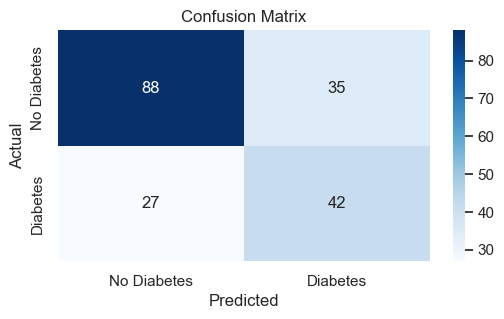

In [47]:
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

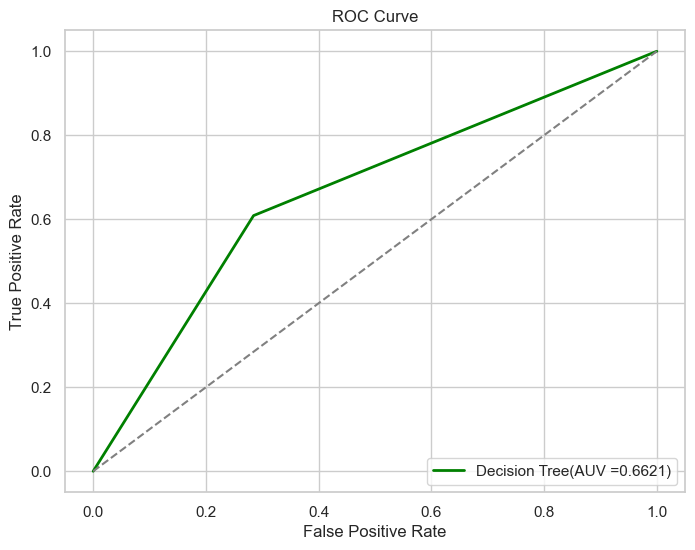

In [60]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='green',lw=2,label=f'Decision Tree(AUV ={roc_auc:.4f})')
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(max_iter=1000,random_state=42)
lr_model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=42)

In [50]:
y_pred_lr=lr_model.predict(x_test)

In [51]:
# Evaluation Metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_lr)
precision_log_reg = precision_score(y_test, y_pred_lr)
recall_log_reg = recall_score(y_test, y_pred_lr)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_lr)

# Displaying the evaluation metrics with explanations
print(f'Accuracy of Logistic Regression: {accuracy_log_reg:.4f}')
print(f'Precision of Logistic Regression: {precision_log_reg:.4f}')
print(f'Recall of Logistic Regression: {recall_log_reg:.4f}')
print(f'Confusion Matrix for Logistic Regression:\n{conf_matrix_log_reg}')

Accuracy of Logistic Regression: 0.7396
Precision of Logistic Regression: 0.6462
Recall of Logistic Regression: 0.6087
Confusion Matrix for Logistic Regression:
[[100  23]
 [ 27  42]]


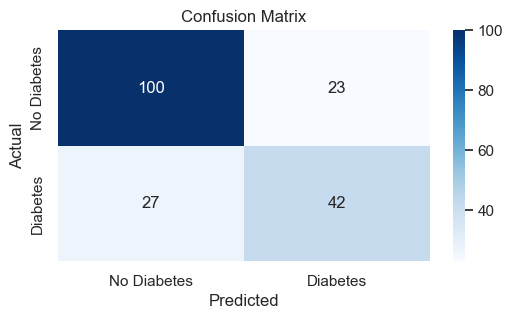

In [53]:
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix_log_reg,annot=True,fmt='d',cmap='Blues',xticklabels=['No Diabetes','Diabetes'],yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

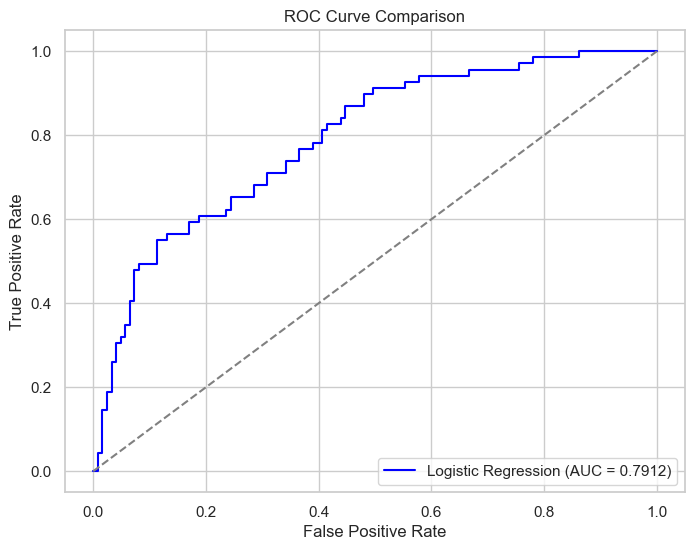

In [66]:
# Plotting the ROC Curve for Logistic Regession
y_prob_lr = lr_model.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
# AUC scores
auc_lr = roc_auc_score(y_test, y_prob_lr)
# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.4f})", color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### **ROC Curve For both Model**

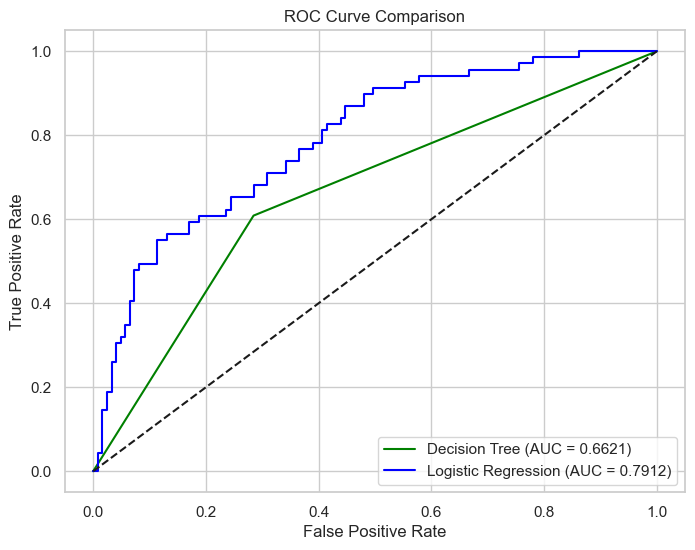

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for ROC
y_prob_dt = dt_model.predict_proba(x_test)[:, 1]
y_prob_lr = lr_model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# AUC scores
auc_dt = roc_auc_score(y_test, y_prob_dt)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.4f})", color='green')
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.4f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [65]:
# Comparison Table
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt],
    'Logistic Regression': [accuracy_log_reg, precision_log_reg, recall_log_reg]
})

print("Model Comparison:\n")
print(comparison_df)

Model Comparison:

      Metric  Decision Tree  Logistic Regression
0   Accuracy       0.677083             0.739583
1  Precision       0.545455             0.646154
2     Recall       0.608696             0.608696


# Model Comparison Analysis


### 1. **Accuracy**
- **Logistic Regression** has higher accuracy (73.95%) than **Decision Tree** (67.7%).
- This means **Logistic Regression** is better at making correct predictions overall.
### 2. **Precision**
- **Logistic Regression** has a higher precision (64.61%) compared to **Decision Tree** (54.54%).
- Precision tells us how many of the predicted positive cases are actually positive. Higher precision means fewer false positives.

### 3. **Recall**
- But in **Recall** both have perform equally **Logistic Regression** (60.86%) and **Decision Tree** (60.86%).
- Recall measures how well the model identifies actual positive cases. A higher recall means fewer missed true positives.

---

# Conclusion: Which Model is Better?

- **Logistic Regression** performs better across all evaluation metrics: **Accuracy**, **Precision**, and **Recall**.
- **Logistic Regression** has:
  - Higher **Accuracy**: More correct predictions.
  - Higher **Precision**: Fewer false positives.
  - Higher **Recall**: Better at identifying actual cases of diabetes.
  
### Why Choose Logistic Regression?

1. **Better Overall Performance**: Logistic Regression performs better in terms of accuracy, precision, and recall.
2. **Fewer False Positives**: Important for medical predictions, where false positives can lead to unnecessary treatments.
3. **Better Detection of Diabetes**: Logistic Regression is more likely to detect individuals who have diabetes.
4. **Simplicity**: Logistic Regression is less prone to overfitting compared to Decision Trees.

Thus, **Logistic Regression** is the better model for predicting diabetes.
